In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import pandas as pd
df=pd.read_csv(r'/Users/dougehlert/Library/CloudStorage/OneDrive-Personal/WGU/D214-Data/bank-D214.csv')

In [3]:
df.head(10)

,age,marital,education,balance,previouscontacts,outcome
0,58,married,tertiary,2143,0,no
1,44,single,secondary,29,0,no
2,33,married,secondary,2,0,no
3,47,married,unknown,1506,0,no
4,33,single,unknown,1,0,no
5,35,married,tertiary,231,0,no
6,28,single,tertiary,447,0,no
7,42,divorced,tertiary,2,0,no
8,58,married,primary,121,0,no
9,43,single,secondary,593,0,no


In [4]:
df.dtypes

age                  int64
marital             object
education           object
balance              int64
previouscontacts     int64
outcome             object
dtype: object

In [5]:
df.isnull().sum()

age                 0
marital             0
education           0
balance             0
previouscontacts    0
outcome             0
dtype: int64

Text(0.5, 1.0, 'Marital')

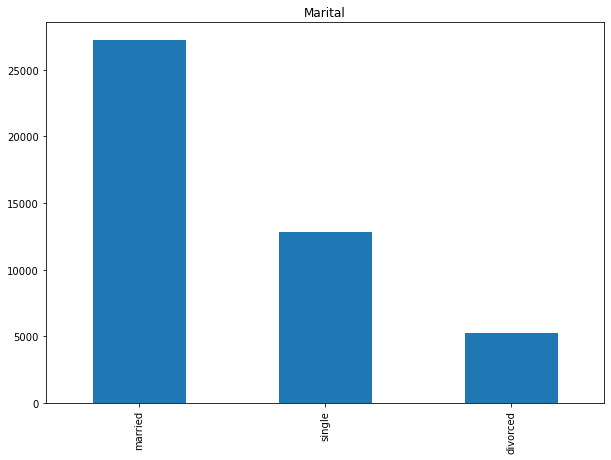

In [6]:
#https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure

#One of these categories will be eliminated during one-hot encoding
marital_status = df['marital'].value_counts()
marital_status

plt.figure(figsize = (10, 7))
#.plot uses pandas
marital_status.plot(kind = "bar")
plt.title("Marital")

Text(0.5, 1.0, 'Education Level')

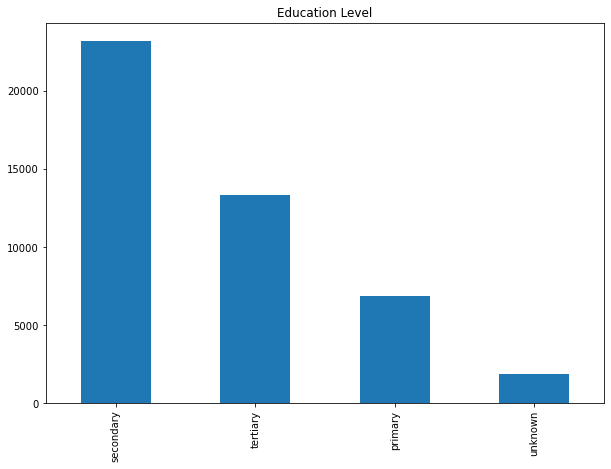

In [7]:
education_level = df['education'].value_counts()
education_level

plt.figure(figsize = (10, 7))
#.plot uses pandas
education_level.plot(kind = "bar")
plt.title("Education Level")

In [8]:
account_balance = df['balance']
account_balance

account_balance.describe()







count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [9]:
previous_contacts = df['previouscontacts']
previous_contacts

previous_contacts.describe()


count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previouscontacts, dtype: float64

In [10]:
age = df['age']
age

age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Outcome')

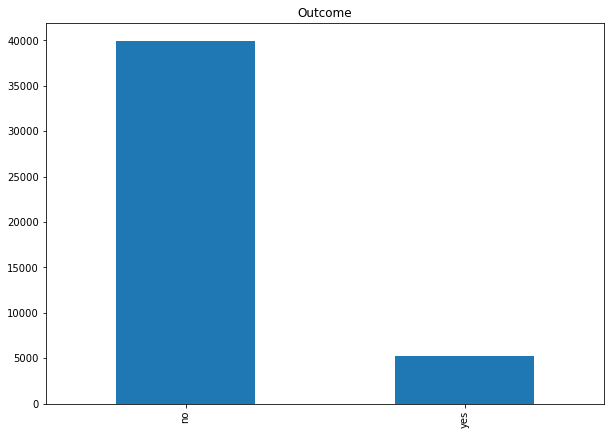

In [11]:
outcome = df['outcome'].value_counts()
outcome

plt.figure(figsize = (10, 7))
#.plot uses pandas
outcome.plot(kind = "bar")
plt.title("Outcome")

In [68]:
df['outcome'].value_counts()

no     39922
yes     5289
Name: outcome, dtype: int64

In [12]:
#import encoder to deal with categorical variables
#import other libraries needed for sklearn module for data prep
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
#Label encoder object
le = LabelEncoder()
# Columns with one or two values can have label encoder run on them
le_count=0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count +=1
print('{} columns were label encoded.' .format(le_count))

df

1 columns were label encoded.


,age,marital,education,balance,previouscontacts,outcome
0,58,married,tertiary,2143,0,0
1,44,single,secondary,29,0,0
2,33,married,secondary,2,0,0
3,47,married,unknown,1506,0,0
4,33,single,unknown,1,0,0
...,...,...,...,...,...,...
45206,51,married,tertiary,825,0,1
45207,71,divorced,primary,1729,0,1
45208,72,married,secondary,5715,3,1
45209,57,married,secondary,668,0,0


In [14]:
#getdummies will be used to assign values and create new columns to the categorical variables
#creating a dummy variable for marital
marital_cat= pd.get_dummies(df['marital'])

marital_cat




,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [15]:
#dummy variable for education
education_cat = pd.get_dummies(df['education'])
education_cat

,primary,secondary,tertiary,unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
45206,0,0,1,0
45207,1,0,0,0
45208,0,1,0,0
45209,0,1,0,0


In [16]:
#Combining the dummy variables into the dataset
df= pd.concat([df, education_cat, marital_cat], axis =1)
df

,age,marital,education,balance,previouscontacts,outcome,primary,secondary,tertiary,unknown,divorced,married,single
0,58,married,tertiary,2143,0,0,0,0,1,0,0,1,0
1,44,single,secondary,29,0,0,0,1,0,0,0,0,1
2,33,married,secondary,2,0,0,0,1,0,0,0,1,0
3,47,married,unknown,1506,0,0,0,0,0,1,0,1,0
4,33,single,unknown,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,825,0,1,0,0,1,0,0,1,0
45207,71,divorced,primary,1729,0,1,1,0,0,0,1,0,0
45208,72,married,secondary,5715,3,1,0,1,0,0,0,1,0
45209,57,married,secondary,668,0,0,0,1,0,0,0,1,0


In [17]:
#drop marital and education
df=df.drop(['marital', 'education'], axis =1)
df


,age,balance,previouscontacts,outcome,primary,secondary,tertiary,unknown,divorced,married,single
0,58,2143,0,0,0,0,1,0,0,1,0
1,44,29,0,0,0,1,0,0,0,0,1
2,33,2,0,0,0,1,0,0,0,1,0
3,47,1506,0,0,0,0,0,1,0,1,0
4,33,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,1,0,0,1,0,0,1,0
45207,71,1729,0,1,1,0,0,0,1,0,0
45208,72,5715,3,1,0,1,0,0,0,1,0
45209,57,668,0,0,0,1,0,0,0,1,0


In [21]:
df

,age,balance,previouscontacts,outcome,primary,secondary,tertiary,unknown,divorced,married,single
0,58,2143,0,0,0,0,1,0,0,1,0
1,44,29,0,0,0,1,0,0,0,0,1
2,33,2,0,0,0,1,0,0,0,1,0
3,47,1506,0,0,0,0,0,1,0,1,0
4,33,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,1,0,0,1,0,0,1,0
45207,71,1729,0,1,1,0,0,0,1,0,0
45208,72,5715,3,1,0,1,0,0,0,1,0
45209,57,668,0,0,0,1,0,0,0,1,0


In [22]:
cont_var = df[['previouscontacts', 'balance', 'age']]
cat_var = df[['primary', 'secondary', 'tertiary', 'unknown', 'divorced', 'married', 'single']]

array([[<AxesSubplot:title={'center':'previouscontacts'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

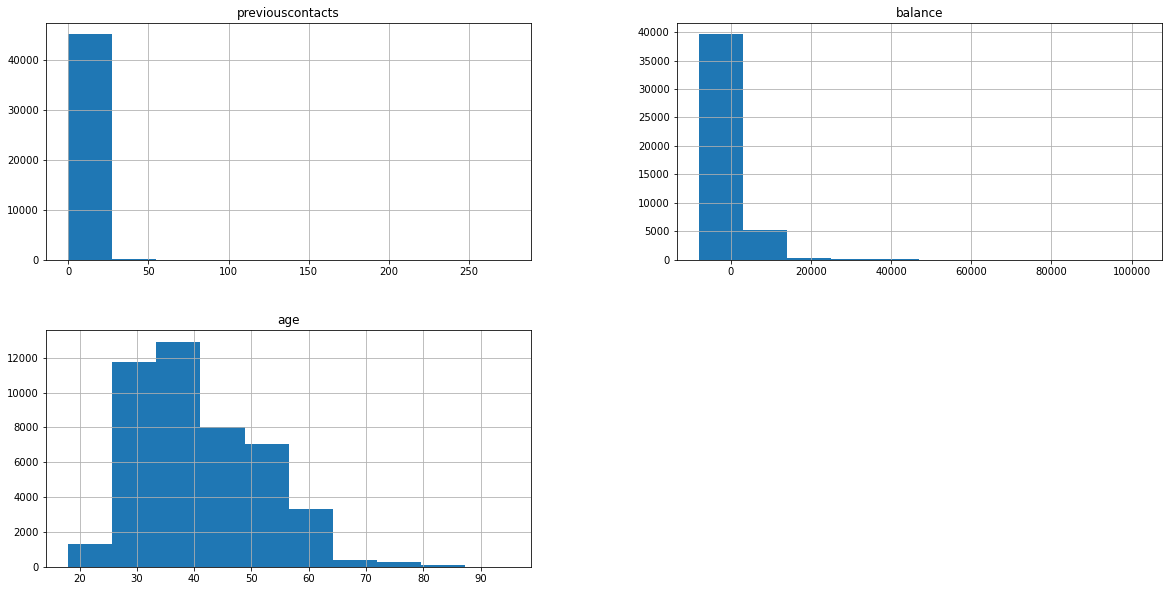

In [23]:
cont_var.hist(figsize =(20,10))

array([[<AxesSubplot:title={'center':'primary'}>,
        <AxesSubplot:title={'center':'secondary'}>,
        <AxesSubplot:title={'center':'tertiary'}>],
       [<AxesSubplot:title={'center':'unknown'}>,
        <AxesSubplot:title={'center':'divorced'}>,
        <AxesSubplot:title={'center':'married'}>],
       [<AxesSubplot:title={'center':'single'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

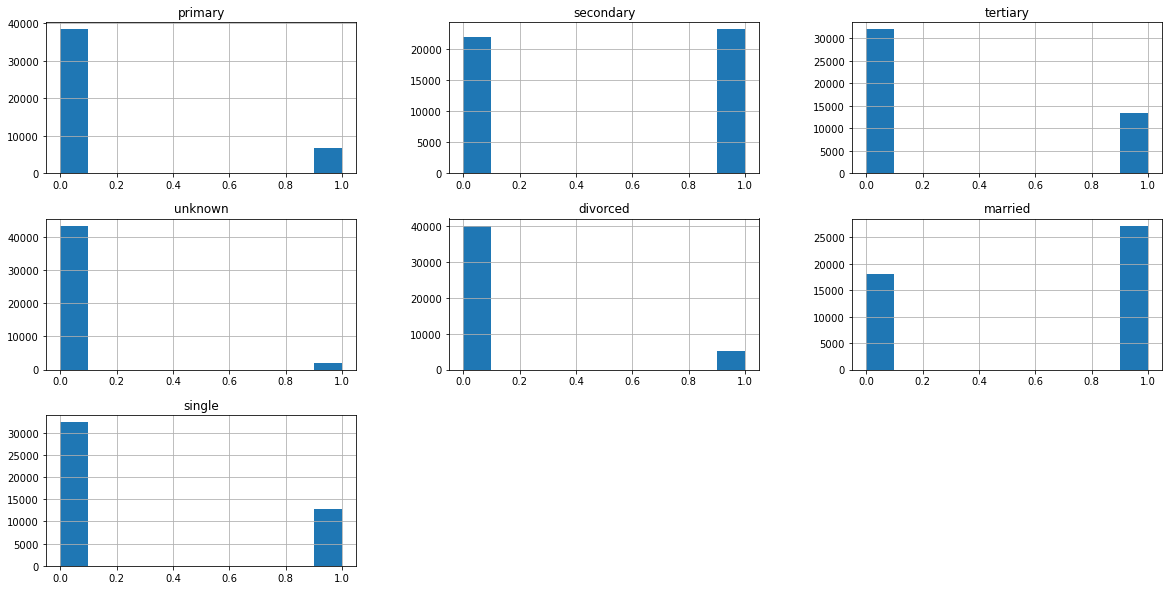

In [24]:
cat_var.hist(figsize = (20,10))

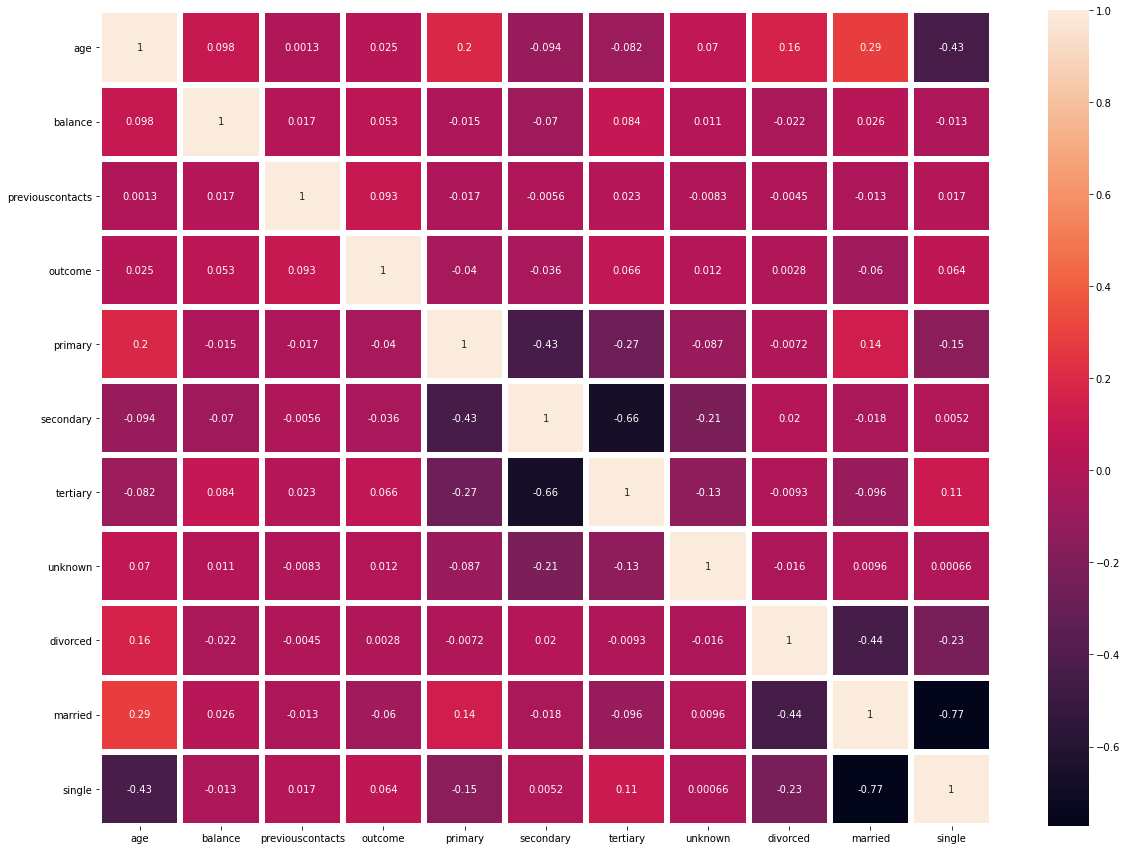

In [25]:
#many of the correlations result from unnecessary variables
#for example, if there are three options (like for married, one can be removed)


corrMatrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True, linewidths=5)
plt.show()

In [26]:
df


,age,balance,previouscontacts,outcome,primary,secondary,tertiary,unknown,divorced,married,single
0,58,2143,0,0,0,0,1,0,0,1,0
1,44,29,0,0,0,1,0,0,0,0,1
2,33,2,0,0,0,1,0,0,0,1,0
3,47,1506,0,0,0,0,0,1,0,1,0
4,33,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,1,0,0,1,0,0,1,0
45207,71,1729,0,1,1,0,0,0,1,0,0
45208,72,5715,3,1,0,1,0,0,0,1,0
45209,57,668,0,0,0,1,0,0,0,1,0


In [27]:
df = df.drop(['unknown', 'single'], axis =1) 

In [28]:
df

,age,balance,previouscontacts,outcome,primary,secondary,tertiary,divorced,married
0,58,2143,0,0,0,0,1,0,1
1,44,29,0,0,0,1,0,0,0
2,33,2,0,0,0,1,0,0,1
3,47,1506,0,0,0,0,0,0,1
4,33,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,825,0,1,0,0,1,0,1
45207,71,1729,0,1,1,0,0,1,0
45208,72,5715,3,1,0,1,0,0,1
45209,57,668,0,0,0,1,0,0,1


In [29]:
#We can also remove variables with a VIF score above 10
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif=pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(X.shape[1])]
    return(vif)
df_x=df[['previouscontacts', 'balance', 'age', 'primary', 'secondary', 'tertiary', 'divorced', 'married']]
calc_vif(df_x)




,variables,VIF
0,previouscontacts,1.063950
1,balance,1.225165
2,age,12.916094
3,primary,2.709451
4,secondary,5.364295
5,tertiary,3.465449
6,divorced,1.592834
7,married,3.794651


In [30]:
#Age has a VIF score above 10 and will be dropped

df=df.drop(['age'], axis=1)
df

,balance,previouscontacts,outcome,primary,secondary,tertiary,divorced,married
0,2143,0,0,0,0,1,0,1
1,29,0,0,0,1,0,0,0
2,2,0,0,0,1,0,0,1
3,1506,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
45206,825,0,1,0,0,1,0,1
45207,1729,0,1,1,0,0,1,0
45208,5715,3,1,0,1,0,0,1
45209,668,0,0,0,1,0,0,1


In [31]:
#rerun and repeat in order to avoid multicollinearity
#We can also remove variables with a VIF score above 10
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif=pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(X.shape[1])]
    return(vif)
df_x=df[['previouscontacts', 'balance', 'primary', 'secondary', 'tertiary', 'divorced', 'married']]
calc_vif(df_x)


,variables,VIF
0,previouscontacts,1.062642
1,balance,1.201573
2,primary,1.554595
3,secondary,2.277066
4,tertiary,1.649916
5,divorced,1.366611
6,married,2.929249


In [ ]:
#no VIF scores above 10

In [32]:
#export cleaned dataset
df.to_csv(r'/Users/dougehlert/Library/CloudStorage/OneDrive-Personal/WGU/D214-Data/D214-cleaned.csv')

In [33]:
#Logistic Regression Model
y=df['outcome']
X = df.drop(columns ='outcome')

y


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: outcome, Length: 45211, dtype: int64

In [34]:
X

,balance,previouscontacts,primary,secondary,tertiary,divorced,married
0,2143,0,0,0,1,0,1
1,29,0,0,1,0,0,0
2,2,0,0,1,0,0,1
3,1506,0,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
45206,825,0,0,0,1,0,1
45207,1729,0,1,0,0,1,0
45208,5715,3,0,1,0,0,1
45209,668,0,0,1,0,0,1


In [42]:
#independent variables with p-values over .05 will be removed
Xc=sm.add_constant(X)
log_reg = sm.Logit(y, Xc)
model_fitted = log_reg.fit()
model_fitted.summary()

Optimization terminated successfully.
         Current function value: 0.352135
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45203
Method:                           MLE   Df Model:                            7
Date:                Sat, 26 Nov 2022   Pseudo R-squ.:                 0.02422
Time:                        10:33:38   Log-Likelihood:                -15920.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                2.387e-166
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7289      0.072    -24.107      0.000      -1.869      -1.588
balance           3.587e-05   3.87e-06      9.260      0.000    2.83e-05    4.35e-05
previouscontacts     0.1111      0.006     18.254      0.000       0.099       0.123
primary             -0.4448      0.081     -5.489      0.000      -0.604      -0.286
secondary           -0.2911      0.072     -4.068      0.000      -0.431      -0.151
tertiary             0.0528      0.073      0.728      0.467      -0.089       0.195
divorced            -0.2008      0.050     -4.017      0.000      -0.299      -0.103
married             -0.3858      0.033    -11.800      0.000      -0.450      -0.322
====================================================================================
"""

In [44]:
#tertiary will be dropped, its p-value is over .467
X = X.drop(['tertiary'], axis =1)

In [45]:
X

,balance,previouscontacts,primary,secondary,divorced,married
0,2143,0,0,0,0,1
1,29,0,0,1,0,0
2,2,0,0,1,0,1
3,1506,0,0,0,0,1
4,1,0,0,0,0,0
...,...,...,...,...,...,...
45206,825,0,0,0,0,1
45207,1729,0,1,0,1,0
45208,5715,3,0,1,0,1
45209,668,0,0,1,0,1


In [46]:
#independent variables with p-values over .05 will be removed
Xc=sm.add_constant(X)
log_reg = sm.Logit(y, Xc)
model_fitted = log_reg.fit()
model_fitted.summary()

Optimization terminated successfully.
         Current function value: 0.352141
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Nov 2022   Pseudo R-squ.:                 0.02420
Time:                        10:35:17   Log-Likelihood:                -15921.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                2.600e-167
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6819      0.031    -54.249      0.000      -1.743      -1.621
balance           3.592e-05   3.87e-06      9.274      0.000    2.83e-05    4.35e-05
previouscontacts     0.1112      0.006     18.268      0.000       0.099       0.123
primary             -0.4912      0.050     -9.861      0.000      -0.589      -0.394
secondary           -0.3377      0.032    -10.635      0.000      -0.400      -0.275
divorced            -0.2010      0.050     -4.021      0.000      -0.299      -0.103
married             -0.3867      0.033    -11.838      0.000      -0.451      -0.323
====================================================================================
"""

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.30, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred=logistic_regression.predict(X_test)


In [52]:
from sklearn import metrics
print('Accuracy: ' ,metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8800501327042171


[[11934    32]
 [ 1595     3]]


<AxesSubplot:xlabel='Predict', ylabel='Actual'>

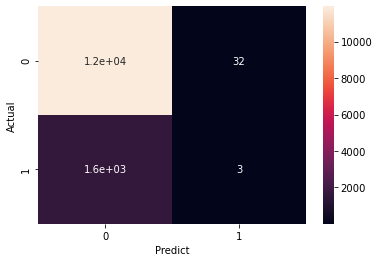

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
matrix_viz = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)
sns.heatmap(matrix_viz, annot=True)

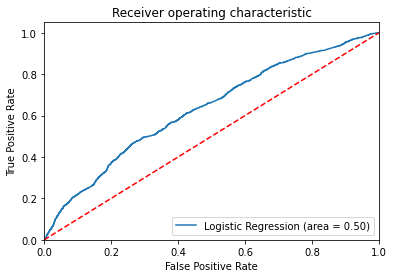

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()